Вывести первые строки таблицы с помощью метода head

In [147]:
import pandas as pd
import numpy
tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C")
data = tmp[10]
print(data.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Определите количество строк и столбцов в датафрейме (атрибут shape)

In [148]:
data.shape

(28, 9)

Замените в таблице значения "—" на значения NaN

In [149]:
import numpy
data.replace(to_replace='—', value=numpy.nan, inplace=True)

Определите типы всех столбцов с помощью dataframe.dtypes

In [150]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [151]:
for i in data.columns:
    if i != 'Регіон':
        data[i] = data[i].apply(lambda x: numpy.float16(x)/10)

Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [152]:
pd.isna(data).sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [153]:
data = data.drop([27], axis=0)

Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [154]:
for i in data.columns:
    if i != 'Регіон':
        data[i].fillna(value=round(data[i].mean(), 1), inplace=True)

Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [155]:
avarage_ua = numpy.float16(tmp[10]["2019"].loc[27])/10
print(data["Регіон"].loc[data["2019"] > avarage_ua])

0                  Крим
1             Вінницька
2             Волинська
3      Дніпропетровська
4              Донецька
5           Житомирська
6          Закарпатська
7            Запорізька
8     Івано-Франківська
9              Київська
10       Кіровоградська
11            Луганська
12            Львівська
13         Миколаївська
14              Одеська
15           Полтавська
16           Рівненська
17              Сумська
18        Тернопільська
19           Харківська
20           Херсонська
21          Хмельницька
22            Черкаська
23          Чернівецька
24         Чернігівська
25                 Київ
26          Севастополь
Name: Регіон, dtype: object


В каком регионе была самая высокая рождаемость в 2014 году?

In [156]:
data.loc[data['2014'] == data["2014"].max()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.9,26.7,19.3,15.8,11.8,15.9,14.8,10.7


Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

<AxesSubplot:>

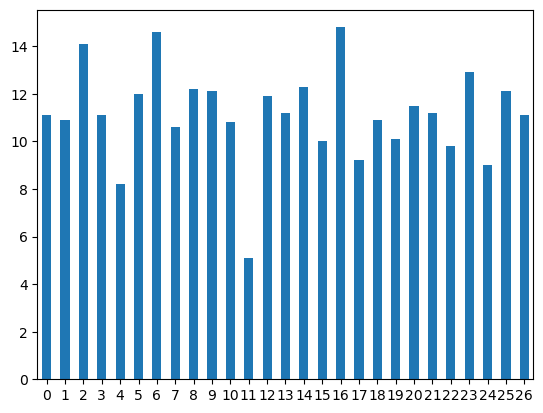

In [157]:
data["2014"].plot.bar(x="2014", y="count", rot=0)